<a href="https://colab.research.google.com/github/monicasenna/movasc_scripts/blob/main/pontos_bacia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
import glob
import os
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
!pip install geemap
import geemap
import pandas as pd
!pip install geopandas
import geopandas as gpd
!pip install plotly
import plotly
#import plotly.express as px
import fiona
import shapely

In [ ]:
##DEFININDO A ÁREA
areas = '/content/drive/MyDrive/0.25/Coord_0.25_novo.csv'
areas_df = pd.read_csv(areas)
areas_df.tail()
areas_df




,Area,Latitude,Longitude
0,Area 1,-20.50,-42.25
1,Area 2,-20.75,-42.50
2,Area 3,-20.75,-42.25
3,Area 4,-20.75,-42.00
4,Area 5,-21.00,-43.00
...,...,...,...
82,Area 91,-23.25,-45.00
83,Area 92,-23.50,-46.25
84,Area 93,-23.50,-46.00
85,Area 94,-23.50,-45.75


In [ ]:
#using geopandas to convert long and lat to points
grade = gpd.GeoDataFrame(areas_df, geometry = gpd.points_from_xy(areas_df.Longitude, areas_df.Latitude))
grade


,Area,Latitude,Longitude,geometry
0,Area 1,-20.50,-42.25,POINT (-42.25000 -20.50000)
1,Area 2,-20.75,-42.50,POINT (-42.50000 -20.75000)
2,Area 3,-20.75,-42.25,POINT (-42.25000 -20.75000)
3,Area 4,-20.75,-42.00,POINT (-42.00000 -20.75000)
4,Area 5,-21.00,-43.00,POINT (-43.00000 -21.00000)
...,...,...,...,...
82,Area 91,-23.25,-45.00,POINT (-45.00000 -23.25000)
83,Area 92,-23.50,-46.25,POINT (-46.25000 -23.50000)
84,Area 93,-23.50,-46.00,POINT (-46.00000 -23.50000)
85,Area 94,-23.50,-45.75,POINT (-45.75000 -23.50000)


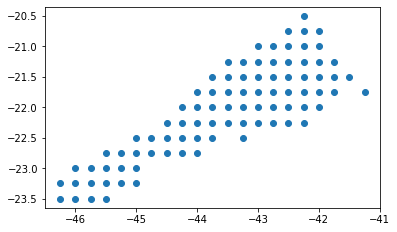

In [ ]:
grade.plot()

In [ ]:
#get build in dataset from geopandas
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

Text(0.5, 1.0, 'Bacia do Rio Paraíba do Sul')

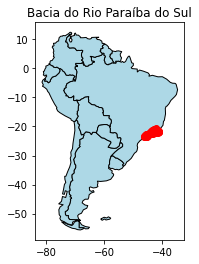

In [ ]:
#plot world map
axis = world_data[world_data.continent == 'South America'].plot(color = 'lightblue', edgecolor = 'black')
grade.plot(ax = axis, color = 'red')
plt.title('Bacia do Rio Paraíba do Sul')

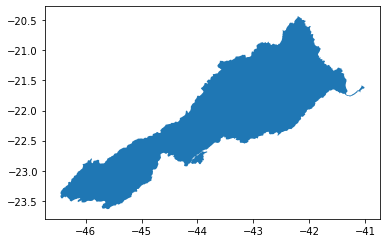

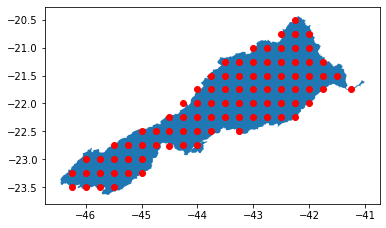

In [ ]:
rj = gpd.read_file('/content/drive/MyDrive/0.25/Bacias.shp')
rj.plot()
base = rj.plot()
grade.plot(ax=base, color = 'red')

Text(0.5, 1.0, 'Pontos de Grade do CHIRPS para a Bacia do Rio Paraíba do Sul na resolução de 0.25º')

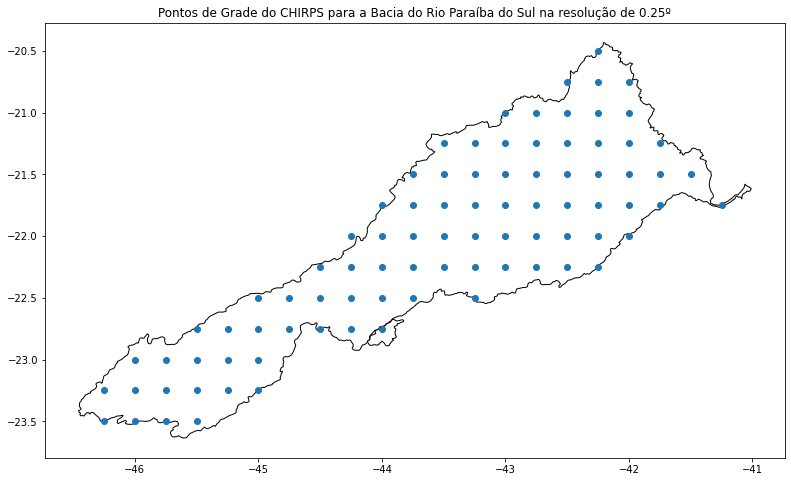

In [ ]:
base = rj.plot(color = 'white', edgecolor = 'black', figsize = (15,8))
grade.plot(ax=base, figsize = (15,8))
plt.title('Pontos de Grade do CHIRPS para a Bacia do Rio Paraíba do Sul na resolução de 0.25º')